# Pima Indians Diabetes dataset

This is a kaggle dataset.

**About this dataset**

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

**Dataset information**

Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

**Relevant papers**

Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

### Attributes:

**Pregnancies:** Number of times pregnant

**Glucose:** Plasma glucose concentration a 2 hours in an oral glucose tolerance test

**BloodPressure:** Diastolic blood pressure (mm Hg)

**SkinThickness:** Triceps skin fold thickness (mm)

**Insulin:** 2-Hour serum insulin (mu U/ml)

**BMI:** Body mass index (weight in kg/(height in m)^2)

**DiabetesPedigreeFunction:** Diabetes pedigree function

**Age:** Age (years)

**Outcome:** Class variable (0 or 1)

In [ ]:
install.packages('dplyr')
install.packages('ggplot2')
install.packages('gridExtra')
install.packages('reshape2')
install.packages('tidyr')
install.packages("ggcorrplot")
install.packages("ROCR")

In [40]:
# Load file
db = read.csv("https://www.dropbox.com/s/oa643s01xamnjim/diabetes.csv?raw=1", header=TRUE)

In [41]:
# Examine first 6 rows of data
head(db)

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0


In [42]:
# Examine structure of data
str(db)

'data.frame':	768 obs. of  9 variables:
 $ Pregnancies             : int  6 1 8 1 0 5 3 10 2 8 ...
 $ Glucose                 : int  148 85 183 89 137 116 78 115 197 125 ...
 $ BloodPressure           : int  72 66 64 66 40 74 50 0 70 96 ...
 $ SkinThickness           : int  35 29 0 23 35 0 32 0 45 0 ...
 $ Insulin                 : int  0 0 0 94 168 0 88 0 543 0 ...
 $ BMI                     : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 0 ...
 $ DiabetesPedigreeFunction: num  0.627 0.351 0.672 0.167 2.288 ...
 $ Age                     : int  50 31 32 21 33 30 26 29 53 54 ...
 $ Outcome                 : int  1 0 1 0 1 0 1 0 1 1 ...


In [43]:
# Examine summary of variables
summary(db)

  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    Insulin           BMI        DiabetesPedigreeFunction      Age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780           Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437           1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725           Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719           Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200           Max.   :81.00  
    Outcome  

In [44]:
# Create Age Category column - To bucket subjects into age brackets
db$Age_Cat <- ifelse(db$Age < 21, "<21", ifelse((db$Age>=21) & (db$Age<=25), "21-25", 
                   ifelse((db$Age>25) & (db$Age<=30), "25-30",
                   ifelse((db$Age>30) & (db$Age<=35), "30-35",
                   ifelse((db$Age>35) & (db$Age<=40), "35-40",
                   ifelse((db$Age>40) & (db$Age<=50), "40-50",
                   ifelse((db$Age>50) & (db$Age<=60), "50-60",">60")))))))

In [45]:
# Convert Age_Cat to factor
db$Age_Cat <- as.factor(db$Age_Cat)

In [46]:
# split dataset into train and test sets
require(caTools)
set.seed(3)
sample = sample.split(db$Outcome, SplitRatio=0.75)
train = subset(db, sample==TRUE)
test = subset(db, sample==FALSE)

In [47]:
# Number of rows in train
nrow(train)

[1] 576

In [48]:
# Number of rows in test
nrow(test)

[1] 192

In [49]:
# Number of rows in entire dataset
nrow(db)

[1] 768

In [50]:
# How is outcome variable distributed

table(train$Outcome)


  0   1 
375 201 

In [ ]:
# Drop 'Outcome' column - THIS STEP IS NOT REQUIRED
#test[,"Outcome"] = NULL

In [51]:
# Number of columns in train
ncol(train)

[1] 10

In [52]:
# Number of columns in test
ncol(test)

[1] 10

In [53]:
# distribution of Age category in Train set
table(train$Age_Cat)


21-25 25-30 30-35 35-40 40-50 50-60   >60 
  197   107    64    52    91    41    24 

In [54]:
# Distribution of Age Category in Test set
table(test$Age_Cat)


21-25 25-30 30-35 35-40 40-50 50-60   >60 
   70    43    17    24    22    13     3 

In [55]:
# Examine new structure of train
str(train)

'data.frame':	576 obs. of  10 variables:
 $ Pregnancies             : int  6 1 1 0 5 3 10 2 8 10 ...
 $ Glucose                 : int  148 85 89 137 116 78 115 197 125 168 ...
 $ BloodPressure           : int  72 66 66 40 74 50 0 70 96 74 ...
 $ SkinThickness           : int  35 29 23 35 0 32 0 45 0 0 ...
 $ Insulin                 : int  0 0 94 168 0 88 0 543 0 0 ...
 $ BMI                     : num  33.6 26.6 28.1 43.1 25.6 31 35.3 30.5 0 38 ...
 $ DiabetesPedigreeFunction: num  0.627 0.351 0.167 2.288 0.201 ...
 $ Age                     : int  50 31 21 33 30 26 29 53 54 34 ...
 $ Outcome                 : int  1 0 0 1 0 1 0 1 1 1 ...
 $ Age_Cat                 : Factor w/ 7 levels "21-25","25-30",..: 5 3 1 3 2 2 2 6 6 3 ...


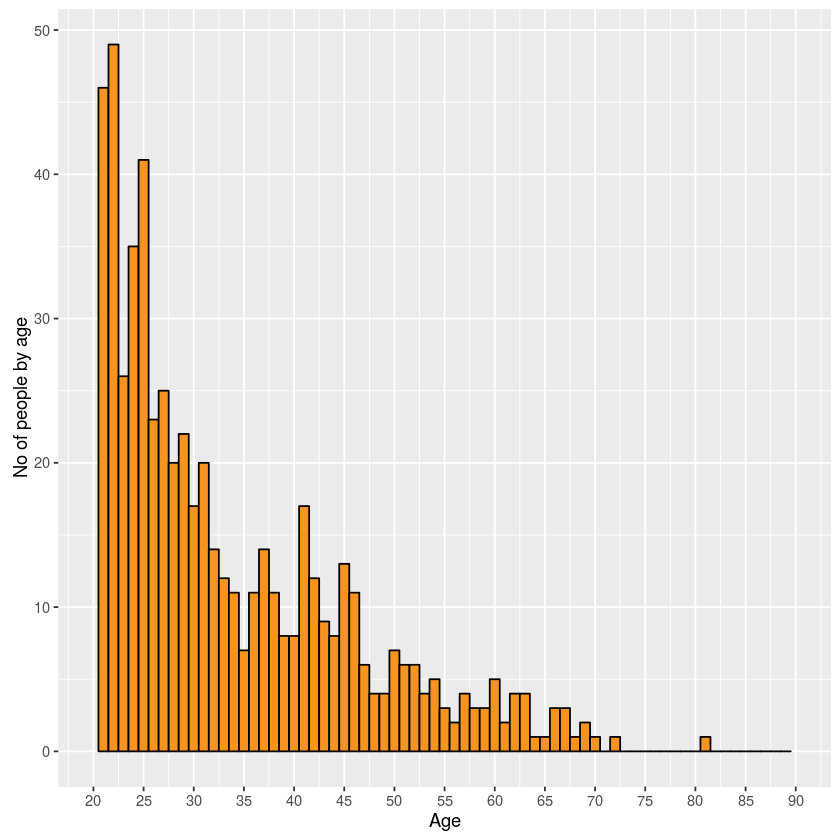

In [56]:
# Histogram of Age
library(ggplot2)

ggplot(aes(x = Age), data=train) +
        geom_histogram(binwidth=1, color='black', fill = "#F79420") +
        scale_x_continuous(limits=c(20,90), breaks=seq(20,90,5)) +
        xlab("Age") +
        ylab("No of people by age")
        


Most of the subjects are in between the ages 21 - 30

[1] "Pregnancies"              "Glucose"                 
 [3] "BloodPressure"            "SkinThickness"           
 [5] "Insulin"                  "BMI"                     
 [7] "DiabetesPedigreeFunction" "Age"                     
 [9] "Outcome"                  "Age_Cat"

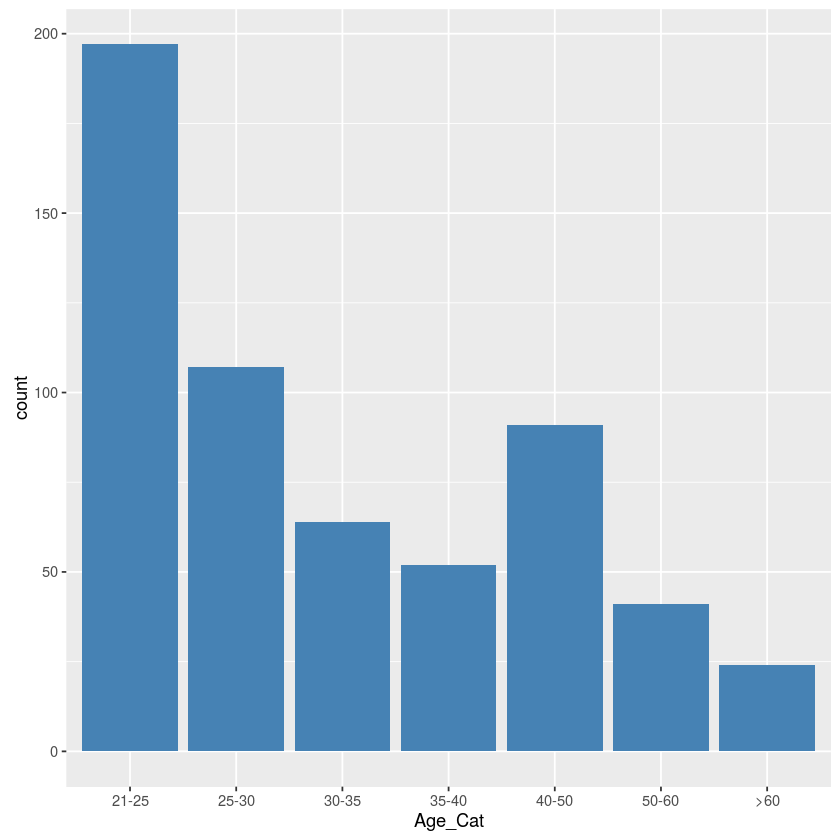

In [57]:
# Barplot by Age_Cat
names(train)
bar_Age_Cat <- ggplot(aes(x = Age_Cat), data = train) +
            geom_bar(fill='steelblue')


bar_Age_Cat
# Horizontal bar plot
#bar_Age_Cat + coord_flip()

[1] "Pregnancies"              "Glucose"                 
 [3] "BloodPressure"            "SkinThickness"           
 [5] "Insulin"                  "BMI"                     
 [7] "DiabetesPedigreeFunction" "Age"                     
 [9] "Outcome"                  "Age_Cat"

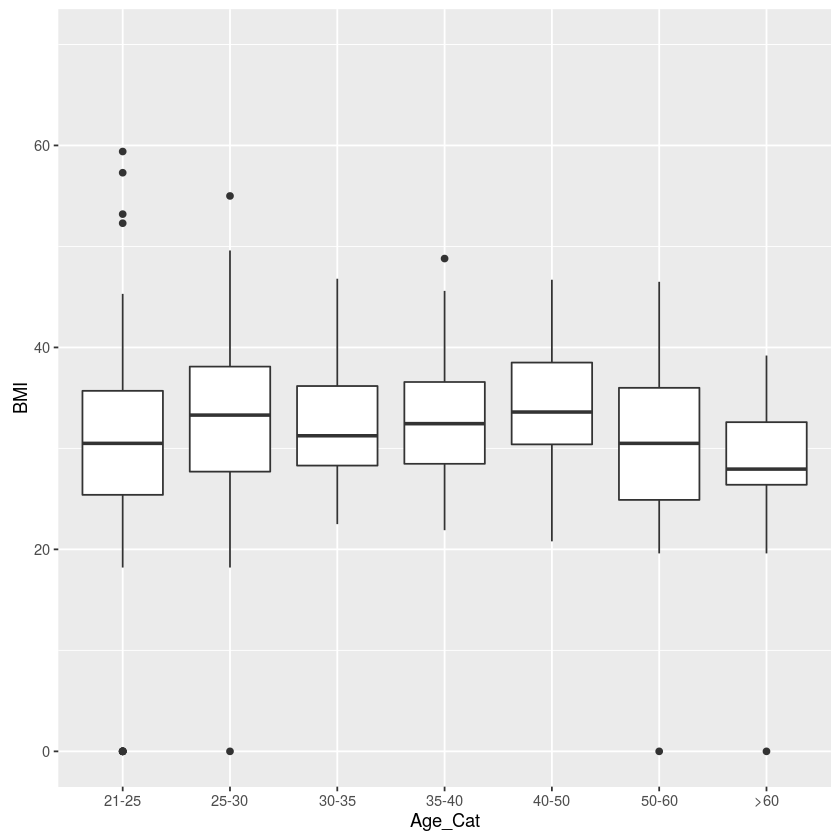

In [58]:
# box plot of Age_Cat vs BMI

names(train)

ggplot(aes(x=Age_Cat, y = BMI), data = train) +
        geom_boxplot() +
        coord_cartesian(ylim = c(0,70))

In [59]:
by(train$BMI, train$Age_Cat, summary)

train$Age_Cat: 21-25
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   25.40   30.50   30.55   35.70   59.40 
------------------------------------------------------------ 
train$Age_Cat: 25-30
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   27.70   33.30   33.15   38.10   55.00 
------------------------------------------------------------ 
train$Age_Cat: 30-35
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  22.50   28.30   31.25   32.55   36.18   46.80 
------------------------------------------------------------ 
train$Age_Cat: 35-40
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  21.90   28.48   32.45   32.74   36.58   48.80 
------------------------------------------------------------ 
train$Age_Cat: 40-50
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  20.80   30.40   33.60   34.53   38.50   46.70 
------------------------------------------------------------ 
train$Age_Cat: 50-60
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0    24.9    30.5  

In [60]:
# Compute correlation matrix
names(train)
db_cor <- round(cor(train[1:8]),1)
db_cor

[1] "Pregnancies"              "Glucose"                 
 [3] "BloodPressure"            "SkinThickness"           
 [5] "Insulin"                  "BMI"                     
 [7] "DiabetesPedigreeFunction" "Age"                     
 [9] "Outcome"                  "Age_Cat"

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.0,0.1,0.2,-0.1,-0.1,0.0,-0.1,0.5
Glucose,0.1,1.0,0.2,0.1,0.3,0.2,0.1,0.3
BloodPressure,0.2,0.2,1.0,0.2,0.1,0.3,0.0,0.3
SkinThickness,-0.1,0.1,0.2,1.0,0.4,0.4,0.2,-0.1
Insulin,-0.1,0.3,0.1,0.4,1.0,0.2,0.2,-0.1
BMI,0.0,0.2,0.3,0.4,0.2,1.0,0.2,0.0
DiabetesPedigreeFunction,-0.1,0.1,0.0,0.2,0.2,0.2,1.0,0.0
Age,0.5,0.3,0.3,-0.1,-0.1,0.0,0.0,1.0


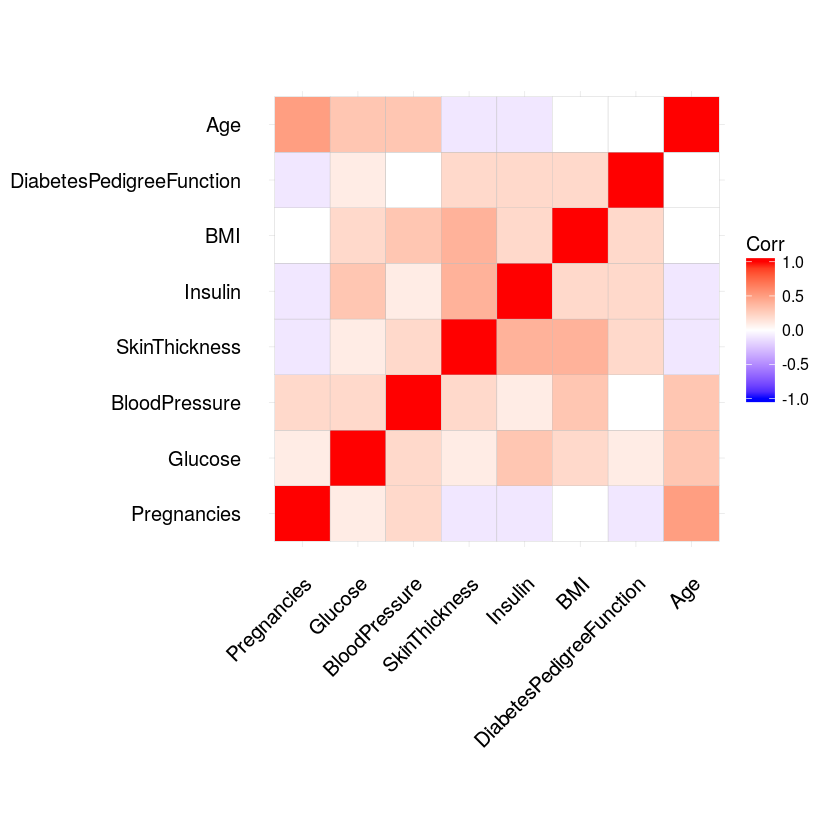

In [61]:
library(ggcorrplot)
ggcorrplot(db_cor)

No strong correlation observed between variables. So, no need to drop any of them for analysis

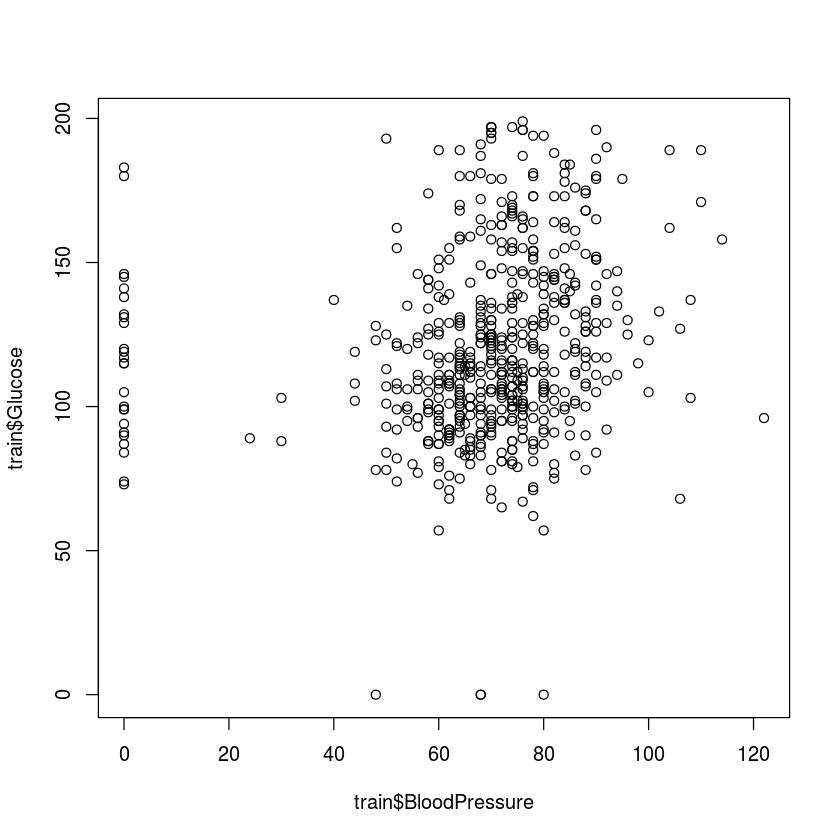

In [62]:
plot(train$BloodPressure, train$Glucose)

This plot justifies the correlation matrix results

In [63]:
# Baseline model

table(db$Outcome)


  0   1 
500 268 

**Do not select the model whose accuracy is lower than the baseline model. In this case, it is 0.65**

In [64]:
# Baseline model = Value of the most frequent outcome/number of rows

baseline <- round(500/nrow(db),2)
baseline

[1] 0.65

## Fit Model using all independent variables

In [65]:
# Fit model - using all independent variables

AllVar <- glm(Outcome ~ ., data = train, family = binomial)
summary(AllVar)


Call:
glm(formula = Outcome ~ ., family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5680  -0.7074  -0.4311   0.7421   2.8979  

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -6.140633   1.442614  -4.257 2.08e-05 ***
Pregnancies               0.043779   0.039640   1.104 0.269414    
Glucose                   0.034511   0.004255   8.111 5.00e-16 ***
BloodPressure            -0.015237   0.006253  -2.437 0.014818 *  
SkinThickness             0.004535   0.007823   0.580 0.562170    
Insulin                  -0.001881   0.001034  -1.819 0.068962 .  
BMI                       0.066069   0.017458   3.785 0.000154 ***
DiabetesPedigreeFunction  1.042778   0.353860   2.947 0.003210 ** 
Age                      -0.048658   0.052789  -0.922 0.356659    
Age_Cat25-30              0.557992   0.418509   1.333 0.182439    
Age_Cat30-35              1.370840   0.626633   2.188 0.028697 *  


In [66]:
# Let's predict outcome on Training dataset

PredictTrain <- predict(AllVar, type = "response")
summary(PredictTrain)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.002399 0.116200 0.266700 0.349000 0.548900 0.987600 

In [67]:
# This computes the average prediction for each of the two outcomes

tapply(PredictTrain, train$Outcome, mean)

0         1 
0.2339362 0.5635518

### Build Confusion Matrix

**Confusion Matrix:**  Compares the actual outcomes with the predicted ones  

|            | Predicted = 0        | Predicted = 1        |
|------------|----------------------|----------------------|
| **Actual = 0** | True Negatives (TN)  | False Positives (FP) |
| **Actual = 1** | False Negatives (FN) | True Positives (TP)  |  

**Sensitivity** = TP / TP + FN (True Positive rate)  
**Specificity** = TN / TN + FP (True Negative rate)  

The model with a **higher threshold** has **lower Sensitivity** but **higher Specificity**.  
The model with a **lower threshold** has **higher Sensitivity** but **lower Specificity**. 

#### Thresholding:

The outcome of a logistic regression model is a **probability**.  
We can do this using a ***threshold value t***  
  - If P(y=1) >= t, predict 1
  - If P(y=1) < t, predict 0
  
**What value should be selected for t?**  

Often selected based on which errors are **better**  

If t is **large**, predict P(y=1) rarely (when P(y=1) is large)  
If t is **small**, predict P(y=0) rarely (when P(y=1) is small) 

With no preference between errors, select **t=0.5**. Predicts the more likely outcome

In [68]:
# Build confusion matrix with a threshold value of 0.5

threshold_0.5 <- table(train$Outcome, PredictTrain > 0.5)
threshold_0.5

# Accuracy
accuracy_0.5 <- round(sum(diag(threshold_0.5))/sum(threshold_0.5),2)
sprintf("Accuracy is %s",accuracy_0.5)

# Mis-classification error rate
MC_0.5 <- 1-accuracy_0.5
sprintf("Mis-classification error is %s",MC_0.5)

   
    FALSE TRUE
  0   333   42
  1    83  118

[1] "Accuracy is 0.78"

[1] "Mis-classification error is 0.22"

In [69]:
sensitivity0.5 <- round(118/(83+118),2)
specificity0.5 <- round(333/(333+42),2)
sprintf("Sensitivity at 0.5 threshold: %s", sensitivity0.5)
sprintf("Specificity at 0.5 threshold: %s", specificity0.5)

[1] "Sensitivity at 0.5 threshold: 0.59"

[1] "Specificity at 0.5 threshold: 0.89"

In [70]:
# Build confusion matrix with a threshold value of 0.7

threshold_0.7 <- table(train$Outcome, PredictTrain > 0.7)
threshold_0.7

# Accuracy
accuracy_0.7 <- round(sum(diag(threshold_0.7))/sum(threshold_0.7),2)
sprintf('Accuracy is %s', accuracy_0.7)

# Mis-classification error rate
MC_0.7 <- 1-accuracy_0.7
sprintf("Mis-classification error is %s",MC_0.7)

   
    FALSE TRUE
  0   359   16
  1   123   78

[1] "Accuracy is 0.76"

[1] "Mis-classification error is 0.24"

In [71]:
sensitivity0.7 <- round(78/(123+78),2)
specificity0.7 <- round(359/(359+16),2)
sprintf("Sensitivity at 0.7 threshold: %s", sensitivity0.7)
sprintf("Specificity at 0.7 threshold: %s", specificity0.7)

[1] "Sensitivity at 0.7 threshold: 0.39"

[1] "Specificity at 0.7 threshold: 0.96"

In [72]:
# Build confusion matrix with a threshold value of 0.2

threshold_0.2 <- table(train$Outcome, PredictTrain > 0.2)
threshold_0.2

# Accuracy
accuracy_0.2 <- round(sum(diag(threshold_0.2))/sum(threshold_0.2),2)
sprintf("Accuracy is %s", accuracy_0.2)

# Mis-classification error rate
MC_0.2 <- 1-accuracy_0.2
sprintf("Mis-classification error is %s",MC_0.2)

   
    FALSE TRUE
  0   215  160
  1    21  180

[1] "Accuracy is 0.69"

[1] "Mis-classification error is 0.31"

In [73]:
sensitivity0.2 <- round(180/(21+180),2)
specificity0.2 <- round(215/(215+160),2)
sprintf("Sensitivity at 0.2 threshold: %s",sensitivity0.2)
sprintf("Specificity at 0.2 threshold: %s",specificity0.2)

[1] "Sensitivity at 0.2 threshold: 0.9"

[1] "Specificity at 0.2 threshold: 0.57"

### ROC Curves (Receiver Operator Characteristic Curve)

**ROC Curve** will help us decide as which threshold is best  

**High threshold:**
  - High specificity
  - Low sensitivity  
  
**Low threshold:**
  - Low specificity
  - High sensitivity


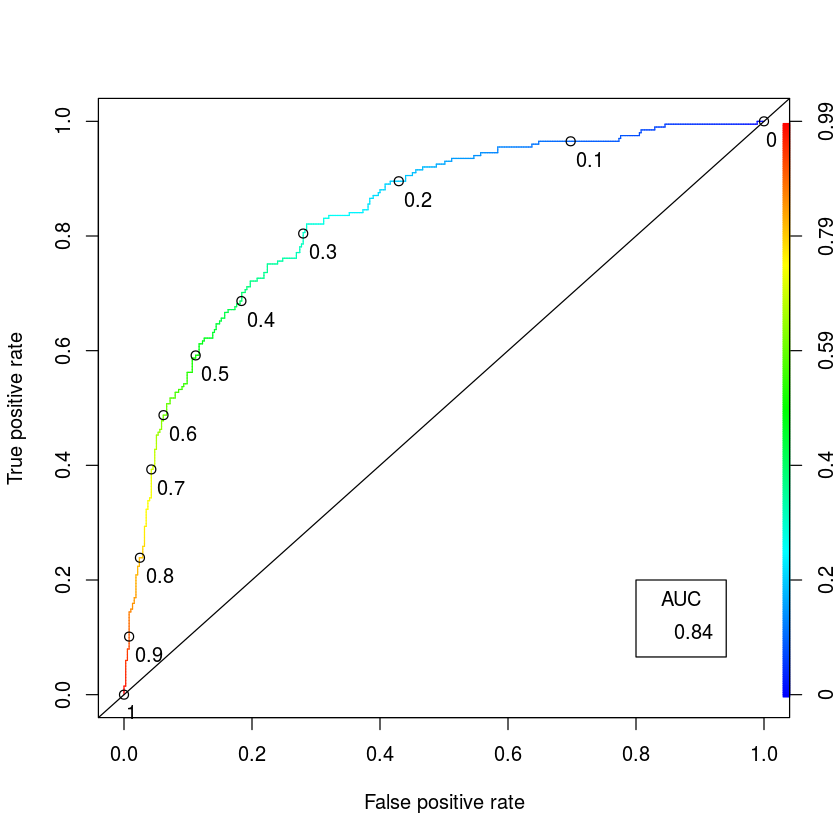

In [74]:
# Generate ROC Curves

library(ROCR)

ROCRpred = prediction(PredictTrain, train$Outcome)
ROCRperf = performance(ROCRpred, "tpr", "fpr")

#plot(ROCRperf, colorize = TRUE)

# Adding threshold labels
plot(ROCRperf, colorize=TRUE, print.cutoffs.at = seq(0,1,0.1), text.adj = c(-0.2, 1.7))
abline(a=0, b=1)

auc_train <- round(as.numeric(performance(ROCRpred, "auc")@y.values),2)
legend(.8, .2, auc_train, title = "AUC")

## Interpreting the model

**AUC (Area under the ROC curve)**: Absolute value of quality of prediction  

AUC = Maximum of 1 (Perfect prediction)  
AUC = minimum of 0.5 (just guessing)  

|            | Predicted class = 0        | Predicted class = 1        |
|------------|----------------------|----------------------|
| **Actual class = 0** | True Negatives (TN)  | False Positives (FP) |
| **Actual class = 1** | False Negatives (FN) | True Positives (TP)  | 


N = Number of obervations 

Overall accuracy = (TN + TP) / N  

- Sensitivity = TP/(TP + FN)  
- Specificity = TN/(TN + FP)  

Overall error rate = (FP + FN) / N  

- False Negative Error Rate = FN/(TP + FN)  
- False Positive Error Rate = FP/(TN + FP)  

***False positive error rate = 1 - specificity***



## Make predictions on test set

In [75]:
# Making predictions on test set

PredictTest <- predict(AllVar, type = "response", newdata = test)

# Convert probabilities to values using the below

## Based on ROC curve above, selected a threshold of 0.5
test_tab <- table(test$Outcome, PredictTest > 0.5)
test_tab

accuracy_test <- round(sum(diag(test_tab))/sum(test_tab),2)
sprintf("Accuracy on test set is %s", accuracy_test)

   
    FALSE TRUE
  0   115   10
  1    25   42

[1] "Accuracy on test set is 0.82"

In [76]:
# Compute test set AUC

ROCRPredTest = prediction(PredictTest, test$Outcome)
auc = round(as.numeric(performance(ROCRPredTest, "auc")@y.values),2)
auc

[1] 0.89

**The AUC on the test set indicates that the predictive ability of the model is good**